<h1 align="center"> Diabetic Retinopathy </h1>

### Nama : Sumarno HadiPutra
### Nim    : 09011381722084
#### SK 5 Unggulan

<div class="alert alert-danger">
<h2> <center>Artificial Neural Network

<p1> Diabetic Retinopathy, juga dikenal sebagai penyakit mata diabetes, adalah kondisi medis di mana kerusakan terjadi pada retina karena diabetes mellitus. Ini adalah penyebab utama kebutaan.

Diabetic Retinopathy mempengaruhi hingga 80 persen dari mereka yang menderita diabetes selama 20 tahun atau lebih.  Setidaknya 90% dari kasus baru dapat dikurangi dengan perawatan yang tepat dan pemantauan mata.  Semakin lama seseorang menderita diabetes, semakin tinggi peluangnya untuk mengalami diabetic retinopathy.  Setiap tahun di Amerika Serikat, diabetic retinopathy menyumbang 12% dari semua kasus kebutaan baru. Ini juga merupakan penyebab utama kebutaan pada orang yang berusia 20 hingga 64 tahun. </p>

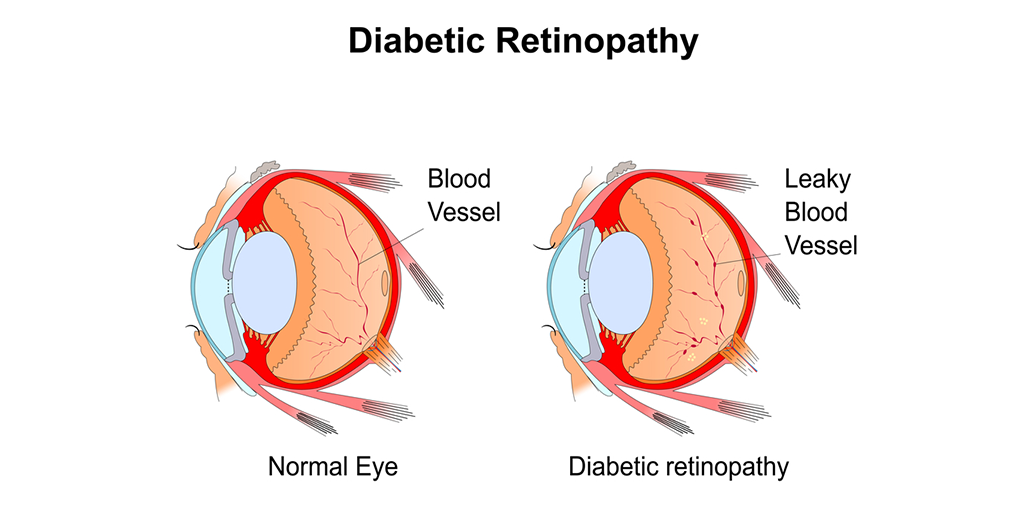

## Memanggil Library Yang Diperlukan

##### 1. Preprocessing
Umumnya digunakan sebagai praktik preliminary data mining, preprocessing mengubah data menjadi format yang akan lebih mudah dan efektif diproses dalam jaringan saraf.

In [1]:
from sklearn.preprocessing import MinMaxScaler

##### 2. Confusion Matrix
Digunakan untuk mengkalkulasi dan mengelompokkan data menjadi sebuah matrix 2x2 yang didalamnya terdapat data prediksi dan data aktual dari dataset yang telah ditraining.  parameter yang digunakan dalam confusion matrix adalah data Categorical dan prediksi hasil training.

In [2]:
from sklearn.metrics import confusion_matrix

##### 3. Model dan Layer
Model yang digunakan untuk membuat hidden layer untuk memproses data adalah fungsi Sequential.  Sedangkan layer sendiri menggunakan tipe Dense yang melakukan training dengan menghubungkan setiap Neural Network secara sequential.

In [3]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


##### 4. Numpy
untuk mengolah data yang berupa angka memerlukan Number Python sebagai library.

In [4]:
import numpy as np

##### 5. Matplotlib
Untuk memvisualisasikan hasil dan proses dari model nanti, dapat digunakan matplotlib sebagai fungsinya.

In [5]:
import matplotlib.pyplot as plt

##### 6. Splitting
Digunakan untuk mencegah terjadinya overfitting pada data

In [6]:
from sklearn.model_selection import train_test_split

## Bobot
Penentuan bobot sangat mempengaruhi hasil dari training. namun untuk data yang masuk ke skala besar, biasanya bobot ditentukan secara random oleh numpy dengan menentukan jumlah seed sesuai dengan banyak data kolom pada dataset.

In [7]:
np.random.seed(19)

## Dataset

##### 1. Informasi Dataset

<p1> Dataset ini berisi fitur yang diekstraksi dari gambar Messidor yang ditetapkan untuk memprediksi apakah suatu gambar mengandung tanda-tanda diabetic retinopathy atau tidak. Semua fitur mewakili lesi yang terdeteksi, fitur deskriptif dari bagian anatomi atau deskriptor tingkat gambar. Analisis gambar metode yang mendasari dan ekstraksi fitur serta teknik klasifikasi dalam dataset ini dijelaskan dalam Balint Antal, Andras Hajdu: An ensemble-based system for automatic screening of diabetic retinopathy, Knowledge-Based Systems 60 (April 2014), 20-27. </p1>
1. Set gambar (Messidor) tersedia di Link -> http://www.adcis.net/en/Download-Third-Party/Messidor.htmlindex-en.php
2. Dataset dapat didownload di Link -> https://www.kaggle.com/sohaibanwaar1203/diabetic-retinopathy-numeric-csv

##### 2. Atribut Dataset

1. <p1> 0) Hasil biner dari penilaian kualitas. 0 = kualitas buruk 1 = kualitas yang memadai. </p1>
2. <p2> 1) Hasil biner dari pra-screening, di mana 1 menunjukkan kelainan retina berat dan 0 kekurangannya. </p2>
3. <p3> 2-7) Hasil deteksi MA. Setiap nilai fitur berlaku untuk jumlah MA yang ditemukan pada tingkat kepercayaan alpha = 0,5,. . . , 1, masing-masing. </p3>
4. <p4> 8-15) berisi informasi yang sama dengan 2-7) untuk eksudat. Namun, sebagai eksudat diwakili oleh satu set poin daripada jumlah piksel membangun lesi, fitur ini dinormalisasi dengan membagi jumlah lesi dengan diameter ROI untuk mengkompensasi gambar yang berbeda ukuran. </p4>
5. <p5> 16) Jarak euclidean dari pusat macula dan pusat cakram optik untuk memberikan informasi penting mengenai kondisi pasien. Fitur ini juga dinormalisasi dengan diameter ROI. </p5>
6. <p6> 17) Diameter cakram optik. </p6>
7. <p7> 18) Hasil biner dari klasifikasi berbasis AM / FM. </p7>
8. <p8> 19) label kelas. 1 = berisi tanda-tanda DR (Accumulative label untuk kelas Messidor 1, 2, 3), 0 = tidak ada tanda-tanda DR. </p8>

In [8]:
dataset = np.loadtxt("csv_result-messidor_features.csv", delimiter=",")
X = dataset[:,1:20]
Y = dataset[:,20]

Dataset yang digunakan dalam proses Neural Network ini telah menggunakan format .csv yang merupakan data vektor yang berisi angka-angka sehingga dapat diproses oleh IDE dengan lebih mudah.

In [9]:
dataset

array([[1.00000e+00, 1.00000e+00, 1.00000e+00, ..., 1.00025e-01,
        1.00000e+00, 0.00000e+00],
       [2.00000e+00, 1.00000e+00, 1.00000e+00, ..., 1.44414e-01,
        0.00000e+00, 0.00000e+00],
       [3.00000e+00, 1.00000e+00, 1.00000e+00, ..., 1.28548e-01,
        0.00000e+00, 1.00000e+00],
       ...,
       [1.14900e+03, 1.00000e+00, 0.00000e+00, ..., 1.29843e-01,
        0.00000e+00, 0.00000e+00],
       [1.15000e+03, 1.00000e+00, 1.00000e+00, ..., 1.06690e-01,
        1.00000e+00, 1.00000e+00],
       [1.15100e+03, 1.00000e+00, 1.00000e+00, ..., 8.89570e-02,
        0.00000e+00, 0.00000e+00]])

In [10]:
X.shape

(1151, 19)

In [11]:
Y

array([0., 0., 1., ..., 0., 1., 0.])

## Preprocessing
Untuk mempreprocessing dataset diatas, saya menggunakan metode MinMaxScaler dimana metode preprocessing ini mengubah fitur dengan penskalaan setiap fitur ke rentang yang diberikan.  Rentang yang diberikan untuk dataset diatas adalah 0 & 1, hal ini dikarenakan mengklasifikasian dataset tersebut menggunakan binary classification.

In [12]:
scaler = MinMaxScaler()
X_scale = scaler.fit(X)
X_scale = scaler.fit_transform(X)

## Splitting Data
Splitting digunakan untuk membagi data menjadi 2 bagian yaitu Training data dan Test Data

In [13]:
train_X, test_X, train_Y, test_Y = train_test_split(X_scale,Y, test_size=0.2)

## Mendefinisikan Model 
Sebagaimana yang telah dijelaskan diatas, bahwasanya model yang digunakan dalam kasus ini menggunakan fungsi Sequential.  Dimana hidden layer yang saya buat untuk memproses dataset diabetic retinopathy ini memiliki 8 layer dengan masing-masing berparameterkan:

Mendefinisikan model sequential() yang ditampung kedalam variabel model

In [14]:
model = Sequential()

##### A. Input Layer

1. Input 1 layer -> 100 units Neural Network, 19 dimensi input, dan menggunakan activation relu.

ReLU atau Rectified Linear Unit menjadi salah satu activation function Karna ReLU pada intinya hanya membuat pembatas pada bilangan nol, artinya apabila x ≤ 0 maka x = 0 dan apabila x > 0 maka x = x

In [15]:
model.add(Dense(100, input_dim=19, activation='relu'))

##### B. Hidden Layer

2. Hidden 6 Layer -> 100 units Neural Network dengan menggunakan activation relu

In [16]:
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))

##### C. Output Layer
Fungsi sigmoid akan menerima angka tunggal dan mengubah nilai x menjadi sebuah nilai yang memiliki range mulai dari 0 sampai 1.sering digunakan pada lapisan akhir dari pengklasifikasian jaringan berbasis saraf.
3. Output 1 layer -> 2 unit Neural Network dengan menggunakan activation sigmoid.

menambahkan layer output kedalam model dengan activation sigmoid

In [17]:
model.add(Dense(1, activation='sigmoid'))

## Compile Model

Setelah melakukan proses definisi model, selanjutnya adalah mengcompile model tersebut sehingga menjadi satu kesatuan hidden yang biasa disebut dengan Hidden Layer.
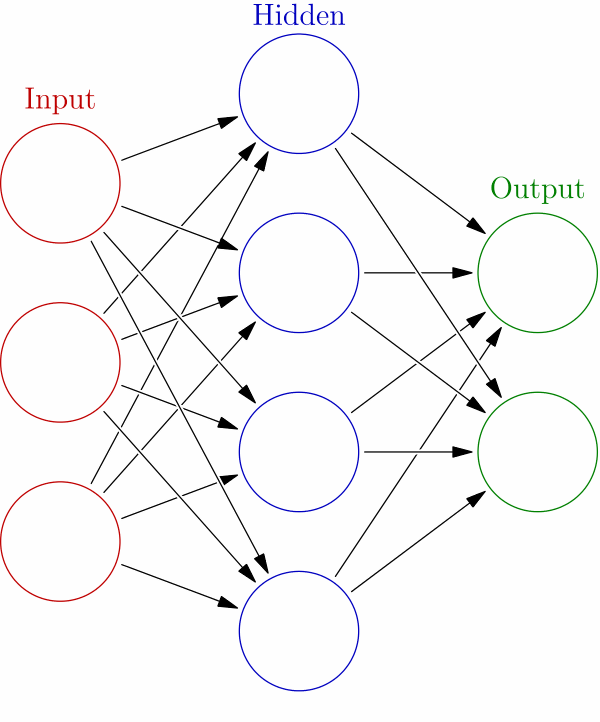

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


##  Fit Model
Untuk mendapatkan hasil akurasi dan loss dari dataset, langkah selanjutnya yang harus dilakukan adalah fit model.  Dimana pada proses ini terjadi proses training dengan parameter:
1. X yang telah di preprocessing
2. Y merupakan label
3. Banyaknya Epochs atau proses training
4. batch_size

Disini Epochs atau training yang saya lakukan adalah sebanyak 450 kali.

In [19]:
Proses = model.fit(X_scale, Y, validation_data=(test_X,test_Y), epochs=450, batch_size=16)
acc_testing  = model.evaluate(test_X, test_Y) 


Train on 1151 samples, validate on 231 samples
Epoch 1/450
1151/1151 [==============================] - 1s 1ms/step - loss: 0.6818 - accuracy: 0.5560 - val_loss: 0.6665 - val_accuracy: 0.5887
Epoch 2/450
1151/1151 [==============================] - 0s 405us/step - loss: 0.6678 - accuracy: 0.5838 - val_loss: 0.6617 - val_accuracy: 0.6061
Epoch 3/450
1151/1151 [==============================] - 1s 622us/step - loss: 0.6569 - accuracy: 0.6195 - val_loss: 0.6555 - val_accuracy: 0.5974
Epoch 4/450
1151/1151 [==============================] - 0s 354us/step - loss: 0.6548 - accuracy: 0.6064 - val_loss: 0.6411 - val_accuracy: 0.6061
Epoch 5/450
1151/1151 [==============================] - 0s 362us/step - loss: 0.6433 - accuracy: 0.6195 - val_loss: 0.6461 - val_accuracy: 0.5844
Epoch 6/450
1151/1151 [==============================] - 0s 313us/step - loss: 0.6258 - accuracy: 0.6533 - val_loss: 0.6084 - val_accuracy: 0.6840
Epoch 7/450
1151/1151 [==============================] - 0s 319us/step -

Epoch 55/450
1151/1151 [==============================] - 0s 324us/step - loss: 0.4743 - accuracy: 0.7619 - val_loss: 0.4763 - val_accuracy: 0.7576
Epoch 56/450
1151/1151 [==============================] - 0s 300us/step - loss: 0.4771 - accuracy: 0.7585 - val_loss: 0.4600 - val_accuracy: 0.7532
Epoch 57/450
1151/1151 [==============================] - 0s 311us/step - loss: 0.4671 - accuracy: 0.7559 - val_loss: 0.5166 - val_accuracy: 0.7229
Epoch 58/450
1151/1151 [==============================] - 0s 291us/step - loss: 0.4692 - accuracy: 0.7619 - val_loss: 0.4497 - val_accuracy: 0.7489
Epoch 59/450
1151/1151 [==============================] - 0s 318us/step - loss: 0.4558 - accuracy: 0.7732 - val_loss: 0.4554 - val_accuracy: 0.7749
Epoch 60/450
1151/1151 [==============================] - 0s 309us/step - loss: 0.4621 - accuracy: 0.7533 - val_loss: 0.4898 - val_accuracy: 0.7489
Epoch 61/450
1151/1151 [==============================] - 0s 302us/step - loss: 0.4797 - accuracy: 0.7533 - val_

Epoch 165/450
1151/1151 [==============================] - 1s 439us/step - loss: 0.3406 - accuracy: 0.8349 - val_loss: 0.3340 - val_accuracy: 0.8442
Epoch 166/450
1151/1151 [==============================] - 0s 336us/step - loss: 0.3870 - accuracy: 0.8184 - val_loss: 0.4472 - val_accuracy: 0.7489
Epoch 167/450
1151/1151 [==============================] - 0s 271us/step - loss: 0.3845 - accuracy: 0.8175 - val_loss: 0.3875 - val_accuracy: 0.8312
Epoch 168/450
1151/1151 [==============================] - 0s 295us/step - loss: 0.3483 - accuracy: 0.8245 - val_loss: 0.3858 - val_accuracy: 0.8268
Epoch 169/450
1151/1151 [==============================] - 0s 293us/step - loss: 0.3481 - accuracy: 0.8341 - val_loss: 0.3452 - val_accuracy: 0.8528
Epoch 170/450
1151/1151 [==============================] - 0s 398us/step - loss: 0.3462 - accuracy: 0.8245 - val_loss: 0.3922 - val_accuracy: 0.7879
Epoch 171/450
1151/1151 [==============================] - 0s 280us/step - loss: 0.3742 - accuracy: 0.8071

Epoch 220/450
1151/1151 [==============================] - 0s 419us/step - loss: 0.2626 - accuracy: 0.8844 - val_loss: 0.2720 - val_accuracy: 0.8788
Epoch 221/450
1151/1151 [==============================] - 0s 300us/step - loss: 0.2815 - accuracy: 0.8732 - val_loss: 0.3017 - val_accuracy: 0.8701
Epoch 222/450
1151/1151 [==============================] - 0s 272us/step - loss: 0.2856 - accuracy: 0.8601 - val_loss: 0.2789 - val_accuracy: 0.8528
Epoch 223/450
1151/1151 [==============================] - 1s 725us/step - loss: 0.2901 - accuracy: 0.8705 - val_loss: 0.3445 - val_accuracy: 0.8268
Epoch 224/450
1151/1151 [==============================] - 0s 340us/step - loss: 0.2945 - accuracy: 0.8688 - val_loss: 0.3265 - val_accuracy: 0.8615
Epoch 225/450
1151/1151 [==============================] - 0s 276us/step - loss: 0.3570 - accuracy: 0.8401 - val_loss: 0.3914 - val_accuracy: 0.8182
Epoch 226/450
1151/1151 [==============================] - 0s 367us/step - loss: 0.3276 - accuracy: 0.8419

Epoch 275/450
1151/1151 [==============================] - 0s 260us/step - loss: 0.2398 - accuracy: 0.8983 - val_loss: 0.2055 - val_accuracy: 0.8918
Epoch 276/450
1151/1151 [==============================] - 0s 331us/step - loss: 0.2142 - accuracy: 0.9062 - val_loss: 0.3153 - val_accuracy: 0.8398
Epoch 277/450
1151/1151 [==============================] - 0s 300us/step - loss: 0.2871 - accuracy: 0.8775 - val_loss: 0.2711 - val_accuracy: 0.9048
Epoch 278/450
1151/1151 [==============================] - 0s 287us/step - loss: 0.2619 - accuracy: 0.8836 - val_loss: 0.2177 - val_accuracy: 0.9048
Epoch 279/450
1151/1151 [==============================] - 0s 332us/step - loss: 0.2243 - accuracy: 0.9044 - val_loss: 0.1929 - val_accuracy: 0.9177
Epoch 280/450
1151/1151 [==============================] - 0s 272us/step - loss: 0.2212 - accuracy: 0.9018 - val_loss: 0.3592 - val_accuracy: 0.8528
Epoch 281/450
1151/1151 [==============================] - 0s 287us/step - loss: 0.2876 - accuracy: 0.8662

Epoch 330/450
1151/1151 [==============================] - 0s 270us/step - loss: 0.1853 - accuracy: 0.9218 - val_loss: 0.1135 - val_accuracy: 0.9524
Epoch 331/450
1151/1151 [==============================] - 0s 265us/step - loss: 0.1690 - accuracy: 0.9253 - val_loss: 0.1612 - val_accuracy: 0.9177
Epoch 332/450
1151/1151 [==============================] - 0s 277us/step - loss: 0.1926 - accuracy: 0.9114 - val_loss: 0.1598 - val_accuracy: 0.9394
Epoch 333/450
1151/1151 [==============================] - 0s 308us/step - loss: 0.1765 - accuracy: 0.9235 - val_loss: 0.1064 - val_accuracy: 0.9524
Epoch 334/450
1151/1151 [==============================] - 1s 758us/step - loss: 0.1582 - accuracy: 0.9235 - val_loss: 0.1769 - val_accuracy: 0.9351
Epoch 335/450
1151/1151 [==============================] - 0s 305us/step - loss: 0.2058 - accuracy: 0.9079 - val_loss: 0.1365 - val_accuracy: 0.9394
Epoch 336/450
1151/1151 [==============================] - 0s 273us/step - loss: 0.2040 - accuracy: 0.9140

Epoch 385/450
1151/1151 [==============================] - 0s 263us/step - loss: 0.1134 - accuracy: 0.9453 - val_loss: 0.0768 - val_accuracy: 0.9654
Epoch 386/450
1151/1151 [==============================] - 0s 256us/step - loss: 0.1405 - accuracy: 0.9366 - val_loss: 0.1083 - val_accuracy: 0.9481
Epoch 387/450
1151/1151 [==============================] - 0s 275us/step - loss: 0.1861 - accuracy: 0.9096 - val_loss: 0.2643 - val_accuracy: 0.8701
Epoch 388/450
1151/1151 [==============================] - 0s 260us/step - loss: 0.1598 - accuracy: 0.9348 - val_loss: 0.0945 - val_accuracy: 0.9654
Epoch 389/450
1151/1151 [==============================] - 0s 265us/step - loss: 0.1077 - accuracy: 0.9505 - val_loss: 0.0907 - val_accuracy: 0.9697
Epoch 390/450
1151/1151 [==============================] - 0s 264us/step - loss: 0.1011 - accuracy: 0.9513 - val_loss: 0.1253 - val_accuracy: 0.9481
Epoch 391/450
1151/1151 [==============================] - 0s 256us/step - loss: 0.1726 - accuracy: 0.9331

Epoch 440/450
1151/1151 [==============================] - 0s 277us/step - loss: 0.1136 - accuracy: 0.9531 - val_loss: 0.0534 - val_accuracy: 1.0000
Epoch 441/450
1151/1151 [==============================] - 0s 284us/step - loss: 0.0738 - accuracy: 0.9713 - val_loss: 0.1089 - val_accuracy: 0.9654
Epoch 442/450
1151/1151 [==============================] - 0s 292us/step - loss: 0.1765 - accuracy: 0.9288 - val_loss: 0.2381 - val_accuracy: 0.9177
Epoch 443/450
1151/1151 [==============================] - 0s 282us/step - loss: 0.1548 - accuracy: 0.9357 - val_loss: 0.0871 - val_accuracy: 0.9784
Epoch 444/450
1151/1151 [==============================] - 0s 263us/step - loss: 0.0975 - accuracy: 0.9618 - val_loss: 0.0648 - val_accuracy: 0.9957
Epoch 445/450
1151/1151 [==============================] - 0s 285us/step - loss: 0.0640 - accuracy: 0.9757 - val_loss: 0.0549 - val_accuracy: 0.9827
Epoch 446/450
1151/1151 [==============================] - 0s 272us/step - loss: 0.1355 - accuracy: 0.9453

In [20]:
print('akurasinya adalah {}'.format(acc_testing[1]))

akurasinya adalah 0.9740259647369385


Secara umum, performa dari proses model neural network untuk dataset diabetic retinopathy yang dibuat tadi sudah dapat dilihat dengan menampilkan akurasinya. hanya saja, untuk performa lain seperti Precisision, Spesificity, dan Sensitivity belum dapat diketahui.  karena membutuhkan fungsi yang berbeda, yaitu confusion matrix.

## Plotting Model Akurasi dan Loss Akurasi

##### Model Akurasi

memodelkan nilai akurasi dalam grafik menggunakan library matplotlib

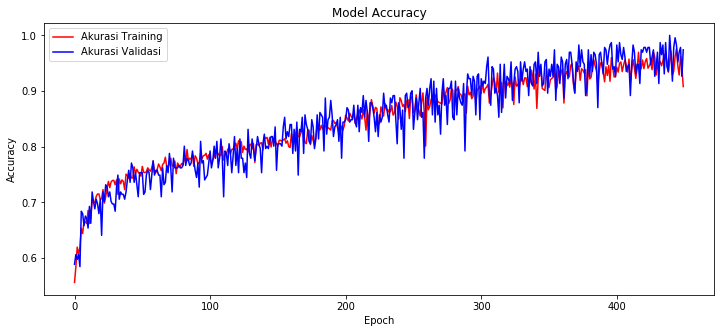

In [21]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
ax0.plot(Proses.history['accuracy'],'red', label='Akurasi Training')
ax0.plot(Proses.history['val_accuracy'], 'blue', label='Akurasi Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()
plt.savefig('Grafik Akurasi.png')

##### Model Loss

memodelkan nilai loss dalam grafik menggunakan library matplotlib

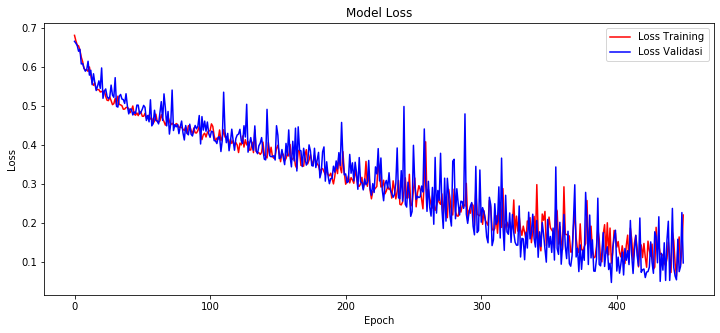

In [22]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(12,5))
ax1.plot(Proses.history['loss'],'red', label='Loss Training')
ax1.plot(Proses.history['val_loss'], 'blue', label='Loss Validasi')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
plt.savefig('Grafik Loss.png')

## Prediksi Model
Prediksi model diambil dari nilai pada data X yang telah di preprocessing, dimana nantinya nilai prediksi tersebut digunakan sebagai parameter confusion matrix.

In [23]:
training_predicted = model.predict(train_X)
testing_predicted = model.predict(test_X)

In [24]:
training_predicted.round()

array([[0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],

## Matriks Confusion

Fungsi untuk menghitung confusion matrix, dimana isi dari list confusion akan ditampung pada variabel TP, TN, FN, FP

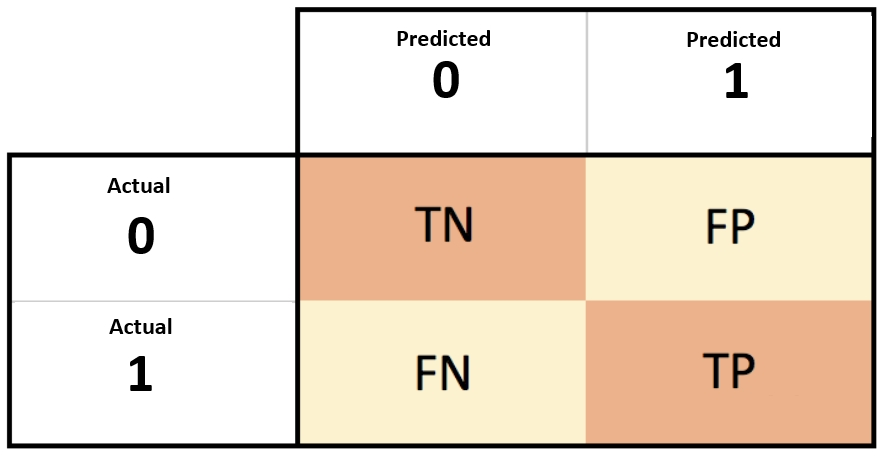

In [25]:
training_cm = confusion_matrix(train_Y,training_predicted.round())
testing_cm = confusion_matrix(test_Y,testing_predicted.round())

Karena data yang didapat dari confusion matrix masih dalam bentuk array, untuk dapat mengkalkulasi nilai tersebut haruslah mengkonversinya kebentuk tipe data integer ataupun float,  saya menggunakan variabel yang bertipe data float
yang nantinya akan membuat persentase dari akurasi, sensitivity, specivicity, dan presisi

In [26]:
training_cm

array([[420,  10],
       [ 16, 474]], dtype=int64)

Pada pengukuran kinerja menggunakan confusion matrix, terdapat 4 (empat) istilah sebagai representasi hasil proses klasifikasi. Keempat istilah tersebut adalah True Positive (TP), True Negative (TN), False Positive (FP) dan False Negative (FN). Nilai True Negative (TN) merupakan jumlah data negatif yang terdeteksi dengan benar, sedangkan False Positive (FP) merupakan data negatif namun terdeteksi sebagai data positif. Sementara itu, True Positive (TP) merupakan data positif yang terdeteksi benar. False Negative (FN) merupakan kebalikan dari True Positive, sehingga data posifit, namun terdeteksi sebagai data negatif.
<br>
Confusion matrix adalah suatu metode yang biasanya digunakan untuk melakukan perhitungan akurasi pada konsep data mining. Rumus ini melakukan perhitungan dengan 4 keluaran, yaitu: specificity, precision, acuraccy dan sensitivity.

In [27]:
tp = training_cm[0][0]
fn = training_cm[0][1]
fp = training_cm[1][0]
tn = training_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy training {0}".format(accuracy))
print("Specificity training {0}".format(specificity))
print("Sensitivity training {0}".format(sensitivity))
print("Precision training {0}".format(precision))
print("F1 Score training {0}".format(f1_score))

Accuracy training 0.9717391304347827
Specificity training 0.9673469387755103
Sensitivity training 0.9767441860465116
Precision training 0.963302752293578
F1 Score training 0.9699769053117783


### 1. Akurasi
menghitung nilai akurasi dengan rumus ((TP+TN)/(TP+TN+FP+FN)) <br>
akurasi merupakan jumlah prediksi yang tepat dari model yang telah di buat atas semua jenis prediksi yang telah di buat.

### 2. Specificity
menghitung nilai specificity dengan rumus (TN/(TN+FP)<br>
Spesifitas adalah ukuran yang memberitahu berapa proporsi pasien yang TIDAK menderita kanker, diprediksi oleh model sebagai non-kanker. Yang sebenarnya tidak mengidap kanker(FP dan TN) dan orang-orang yang didiagnosis oleh model tidak menderita kanker adalah TN. (Catatan: FP disertakan karena Orang itu TIDAK benar-benar menderita kanker meskipun modelnya memperkirakan sebaliknya).


### 3. Sensitivity / recall
menghitung nilai sensitivity dengan rumus (TP/(TP+FN)<br>
Sensitivity adalah ukuran yang memberitahu berapa proporsi pasien yang benar-benar menderita kanker didiagnosis oleh algoritmik sebagai kanker. Yang sebenarnya mengidap kanker (TP dan FN) dan orang-orang yang didiagnosis oleh model yang mengidap kanker (TP). (Catatan: FN dimasukkan karena Orang itu benar-benar mengidap kanker meskipun modelnya memperkirakan sebaliknya).

### 4. Presisi
menghitung nilai presisi dengan rumus (TP/(TP+FP)<br>
Presisi adalah ukuran yang memberi tahu berapa proporsi pasien yang didiagnosis menderita kanker yang sebenarnya memang menderita kanker. Yang diprediksi mengidap kanker (TP dan FP) dan orang-orang yang benar-benar mengidap kanker (TP).


In [28]:
print(testing_cm)

[[108   2]
 [  4 117]]


In [29]:
tp = testing_cm[0][0]
fn = testing_cm[0][1]
fp = testing_cm[1][0]
tn = testing_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy testing {0}".format(accuracy))
print("Specificity testing {0}".format(specificity))
print("Sensitivity testing {0}".format(sensitivity))
print("Precision testing {0}".format(precision))
print("F1 Score testing {0}".format(f1_score))

Accuracy testing 0.974025974025974
Specificity testing 0.9669421487603306
Sensitivity testing 0.9818181818181818
Precision testing 0.9642857142857143
F1 Score testing 0.972972972972973


##### Referensi
Paper : https://ejournal.bsi.ac.id/ejurnal/index.php/paradigma/article/download/1923/1613


dataset : https://www.kaggle.com/sohaibanwaar1203/diabetic-retinopathy-numeric-csv